<a href="https://colab.research.google.com/github/zeyneper/Network-Anomaly-Detection/blob/main/Network_Anomaly_Detection_Zeynep_ER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install interpret
!pip install catboost
!pip install lime
!pip install -U imbalanced-learn
!pip install -U scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import os, re, time, math, tqdm, itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import plotly.express as px
import plotly.offline as pyo
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import joblib
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import class_weight

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

from sklearn.experimental import enable_hist_gradient_boosting  # enable experimental module
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer
import graphviz
import shap

import pickle

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir("/content/drive/MyDrive/BTS_Data")
!ls

02-14-2018.csv	02-16-2018.csv	02-21-2018.csv	02-23-2018.csv	03-01-2018.csv
02-15-2018.csv	02-20-2018.csv	02-22-2018.csv	02-28-2018.csv	03-02-2018.csv


In [ ]:
network_data_d1 = pd.read_csv("/content/drive/MyDrive/BTS_Data/02-14-2018.csv", low_memory=False)
network_data_d2 = pd.read_csv("/content/drive/MyDrive/BTS_Data/02-15-2018.csv", low_memory=False)
network_data_d3 = pd.read_csv("/content/drive/MyDrive/BTS_Data/02-16-2018.csv", low_memory=False)


In [ ]:
network_data_d1.columns


Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
network_data_d2.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
network_data_d3.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
network_data_d1.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   
3            10             1239             2273              744   
4            11             1143             2209              744   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                 0          0.0         0.0   
1                0  ...                 0          0.0         0.0   
2                0  ...                 0          0.0         0.0   
3                0  ...                32          0.0         0.0   
4                0  ...                32          0.0         0.0   

   Active Max  Active Min   Idle Mean    Idle Std  Idle Max  Idle Min   Label  
0           0           0  56320859.5  139.300036  56320958  56320761  Benign  
1           0           0  56320733.0  114.551299  56320814  56320652  Benign  
2           0           0  56319311.5  301.934596  56319525  56319098  Benign  
3           0           0         0.0    0.000000         0         0  Benign  
4           0           0         0.0    0.000000         0         0  Benign  

[5 rows x 80 columns]

In [ ]:
network_data_d2.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  15/02/2018 08:25:18      112641158             3   
1        22         6  15/02/2018 08:29:05       37366762            14   
2     47514         6  15/02/2018 08:29:42            543             2   
3         0         0  15/02/2018 08:28:07      112640703             3   
4         0         0  15/02/2018 08:30:56      112640874             3   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1            12             2168             2993              712   
2             0               64                0               64   
3             0                0                0                0   
4             0                0                0                0   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean     Active Std  \
0                0  ...                 0          0.0       0.000000   
1                0  ...                32    1024353.0  649038.754495   
2                0  ...                32          0.0       0.000000   
3                0  ...                 0          0.0       0.000000   
4                0  ...                 0          0.0       0.000000   

   Active Max  Active Min   Idle Mean      Idle Std  Idle Max  Idle Min  \
0           0           0  56320579.0  7.042784e+02  56321077  56320081   
1     1601183      321569  11431221.0  3.644991e+06  15617415   8960247   
2           0           0         0.0  0.000000e+00         0         0   
3           0           0  56320351.5  3.669884e+02  56320611  56320092   
4           0           0  56320437.0  7.198347e+02  56320946  56319928   

    Label  
0  Benign  
1  Benign  
2  Benign  
3  Benign  
4  Benign  

[5 rows x 80 columns]

In [ ]:
network_data_d3.head()

Dst Port Protocol            Timestamp Flow Duration Tot Fwd Pkts  \
0        0        0  16/02/2018 08:27:23     112640768            3   
1        0        0  16/02/2018 08:30:12     112641773            3   
2    35605        6  16/02/2018 08:26:55      20784143           23   
3        0        0  16/02/2018 08:33:01     112640836            3   
4       23        6  16/02/2018 08:27:59            20            1   

  Tot Bwd Pkts TotLen Fwd Pkts TotLen Bwd Pkts Fwd Pkt Len Max  \
0            0               0               0               0   
1            0               0               0               0   
2           44            2416            1344             240   
3            0               0               0               0   
4            1               0               0               0   

  Fwd Pkt Len Min  ... Fwd Seg Size Min Active Mean Active Std Active Max  \
0               0  ...                0           0          0          0   
1               0  ...                0           0          0          0   
2              64  ...               20     2624734          0    2624734   
3               0  ...                0           0          0          0   
4               0  ...               20           0          0          0   

  Active Min Idle Mean     Idle Std  Idle Max  Idle Min   Label  
0          0  56300000  138.5929291  56300000  56300000  Benign  
1          0  56300000  263.7508294  56300000  56300000  Benign  
2    2624734   9058214            0   9058214   9058214  Benign  
3          0  56300000  82.02438662  56300000  56300000  Benign  
4          0         0            0         0         0  Benign  

[5 rows x 80 columns]

In [ ]:
def fixDataType(df_dataset):

    df_dataset = df_dataset[df_dataset['Dst Port'] != 'Dst Port']

    df_dataset['Dst Port'] = df_dataset['Dst Port'].astype(int)
    df_dataset['Protocol'] = df_dataset['Protocol'].astype(int)
    df_dataset['Flow Duration'] = df_dataset['Flow Duration'].astype(int)
    df_dataset['Tot Fwd Pkts'] = df_dataset['Tot Fwd Pkts'].astype(int)
    df_dataset['Tot Bwd Pkts'] = df_dataset['Tot Bwd Pkts'].astype(int)
    df_dataset['TotLen Fwd Pkts'] = df_dataset['TotLen Fwd Pkts'].astype(int)
    df_dataset['TotLen Bwd Pkts'] = df_dataset['TotLen Bwd Pkts'].astype(int)
    df_dataset['Fwd Pkt Len Max'] = df_dataset['Fwd Pkt Len Max'].astype(int)
    df_dataset['Fwd Pkt Len Min'] = df_dataset['Fwd Pkt Len Min'].astype(int)
    df_dataset['Fwd Pkt Len Mean'] = df_dataset['Fwd Pkt Len Mean'].astype(float)
    df_dataset['Fwd Pkt Len Std'] = df_dataset['Fwd Pkt Len Std'].astype(float)
    df_dataset['Bwd Pkt Len Max'] = df_dataset['Bwd Pkt Len Max'].astype(int)
    df_dataset['Bwd Pkt Len Min'] = df_dataset['Bwd Pkt Len Min'].astype(int)
    df_dataset['Bwd Pkt Len Mean'] = df_dataset['Bwd Pkt Len Mean'].astype(float)
    df_dataset['Bwd Pkt Len Std'] = df_dataset['Bwd Pkt Len Std'].astype(float)
    df_dataset['Flow Byts/s'] = df_dataset['Flow Byts/s'].astype(float)
    df_dataset['Flow Pkts/s'] = df_dataset['Flow Pkts/s'].astype(float)
    df_dataset['Flow IAT Mean'] = df_dataset['Flow IAT Mean'].astype(float)
    df_dataset['Flow IAT Std'] = df_dataset['Flow IAT Std'].astype(float)
    df_dataset['Flow IAT Max'] = df_dataset['Flow IAT Max'].astype(int)
    df_dataset['Flow IAT Min'] = df_dataset['Flow IAT Min'].astype(int)
    df_dataset['Fwd IAT Tot'] = df_dataset['Fwd IAT Tot'].astype(int)
    df_dataset['Fwd IAT Mean'] = df_dataset['Fwd IAT Mean'].astype(float)
    df_dataset['Fwd IAT Std'] = df_dataset['Fwd IAT Std'].astype(float)
    df_dataset['Fwd IAT Max'] = df_dataset['Fwd IAT Max'].astype(int)
    df_dataset['Fwd IAT Min'] = df_dataset['Fwd IAT Min'].astype(int)
    df_dataset['Bwd IAT Tot'] = df_dataset['Bwd IAT Tot'].astype(int)
    df_dataset['Bwd IAT Mean'] = df_dataset['Bwd IAT Mean'].astype(float)
    df_dataset['Bwd IAT Std'] = df_dataset['Bwd IAT Std'].astype(float)
    df_dataset['Bwd IAT Max'] = df_dataset['Bwd IAT Max'].astype(int)
    df_dataset['Bwd IAT Min'] = df_dataset['Bwd IAT Min'].astype(int)
    df_dataset['Fwd PSH Flags'] = df_dataset['Fwd PSH Flags'].astype(int)
    df_dataset['Bwd PSH Flags'] = df_dataset['Bwd PSH Flags'].astype(int)
    df_dataset['Fwd URG Flags'] = df_dataset['Fwd URG Flags'].astype(int)
    df_dataset['Bwd URG Flags'] = df_dataset['Bwd URG Flags'].astype(int)
    df_dataset['Fwd Header Len'] = df_dataset['Fwd Header Len'].astype(int)
    df_dataset['Bwd Header Len'] = df_dataset['Bwd Header Len'].astype(int)
    df_dataset['Fwd Pkts/s'] = df_dataset['Fwd Pkts/s'].astype(float)
    df_dataset['Bwd Pkts/s'] = df_dataset['Bwd Pkts/s'].astype(float)
    df_dataset['Pkt Len Min'] = df_dataset['Pkt Len Min'].astype(int)
    df_dataset['Pkt Len Max'] = df_dataset['Pkt Len Max'].astype(int)
    df_dataset['Pkt Len Mean'] = df_dataset['Pkt Len Mean'].astype(float)
    df_dataset['Pkt Len Std'] = df_dataset['Pkt Len Std'].astype(float)
    df_dataset['Pkt Len Var'] = df_dataset['Pkt Len Var'].astype(float)
    df_dataset['FIN Flag Cnt'] = df_dataset['FIN Flag Cnt'].astype(int)
    df_dataset['SYN Flag Cnt'] = df_dataset['SYN Flag Cnt'].astype(int)
    df_dataset['RST Flag Cnt'] = df_dataset['RST Flag Cnt'].astype(int)
    df_dataset['PSH Flag Cnt'] = df_dataset['PSH Flag Cnt'].astype(int)
    df_dataset['ACK Flag Cnt'] = df_dataset['ACK Flag Cnt'].astype(int)
    df_dataset['URG Flag Cnt'] = df_dataset['URG Flag Cnt'].astype(int)
    df_dataset['CWE Flag Count'] = df_dataset['CWE Flag Count'].astype(int)
    df_dataset['ECE Flag Cnt'] = df_dataset['ECE Flag Cnt'].astype(int)
    df_dataset['Down/Up Ratio'] = df_dataset['Down/Up Ratio'].astype(int)
    df_dataset['Pkt Size Avg'] = df_dataset['Pkt Size Avg'].astype(float)
    df_dataset['Fwd Seg Size Avg'] = df_dataset['Fwd Seg Size Avg'].astype(float)
    df_dataset['Bwd Seg Size Avg'] = df_dataset['Bwd Seg Size Avg'].astype(float)
    df_dataset['Fwd Byts/b Avg'] = df_dataset['Fwd Byts/b Avg'].astype(int)
    df_dataset['Fwd Pkts/b Avg'] = df_dataset['Fwd Pkts/b Avg'].astype(int)
    df_dataset['Fwd Blk Rate Avg'] = df_dataset['Fwd Blk Rate Avg'].astype(int)
    df_dataset['Bwd Byts/b Avg'] = df_dataset['Bwd Byts/b Avg'].astype(int)
    df_dataset['Bwd Pkts/b Avg'] = df_dataset['Bwd Pkts/b Avg'].astype(int)
    df_dataset['Bwd Blk Rate Avg'] = df_dataset['Bwd Blk Rate Avg'].astype(int)
    df_dataset['Subflow Fwd Pkts'] = df_dataset['Subflow Fwd Pkts'].astype(int)
    df_dataset['Subflow Fwd Byts'] = df_dataset['Subflow Fwd Byts'].astype(int)
    df_dataset['Subflow Bwd Pkts'] = df_dataset['Subflow Bwd Pkts'].astype(int)
    df_dataset['Subflow Bwd Byts'] = df_dataset['Subflow Bwd Byts'].astype(int)
    df_dataset['Init Fwd Win Byts'] = df_dataset['Init Fwd Win Byts'].astype(int)
    df_dataset['Init Bwd Win Byts'] = df_dataset['Init Bwd Win Byts'].astype(int)
    df_dataset['Fwd Act Data Pkts'] = df_dataset['Fwd Act Data Pkts'].astype(int)
    df_dataset['Fwd Seg Size Min'] = df_dataset['Fwd Seg Size Min'].astype(int)
    df_dataset['Active Mean'] = df_dataset['Active Mean'].astype(float)
    df_dataset['Active Std'] = df_dataset['Active Std'].astype(float)
    df_dataset['Active Max'] = df_dataset['Active Max'].astype(int)
    df_dataset['Active Min'] = df_dataset['Active Min'].astype(int)
    df_dataset['Idle Mean'] = df_dataset['Idle Mean'].astype(float)
    df_dataset['Idle Std'] = df_dataset['Idle Std'].astype(float)
    df_dataset['Idle Max'] = df_dataset['Idle Max'].astype(int)
    df_dataset['Idle Min'] = df_dataset['Idle Min'].astype(int)

    return df_dataset

In [ ]:
network_data_d1 = fixDataType(network_data_d1)
network_data_d2 = fixDataType(network_data_d2)
network_data_d3 = fixDataType(network_data_d3)

In [ ]:
def dataProperties(df, day):
    print(day)
    df.shape
    print ('Number of rows (Samples): ' , df.shape[0])
    print ('Number of columns (Features): ' , df.shape[1])
    print(df['Label'].value_counts())
    print("\n\n\n")

In [ ]:
dataProperties(network_data_d1, "Day 1")
dataProperties(network_data_d2, "Day 2")
dataProperties(network_data_d3, "Day 3")

Day 1
Number of rows (Samples):  1048575
Number of columns (Features):  80
Label
Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: count, dtype: int64




Day 2
Number of rows (Samples):  1048575
Number of columns (Features):  80
Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64




Day 3
Number of rows (Samples):  1048574
Number of columns (Features):  80
Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64






In [ ]:
def visualizeBar(df):
    plt.figure(figsize=(10, 5))
    plt.title('Packet Distribution')
    plt.bar(x=df['Label'].unique(), height=df['Label'].value_counts())
    p = plt.gcf()

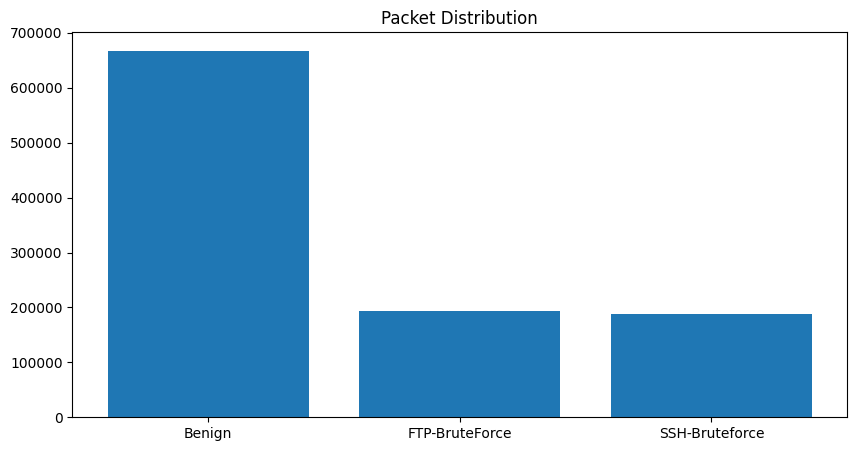

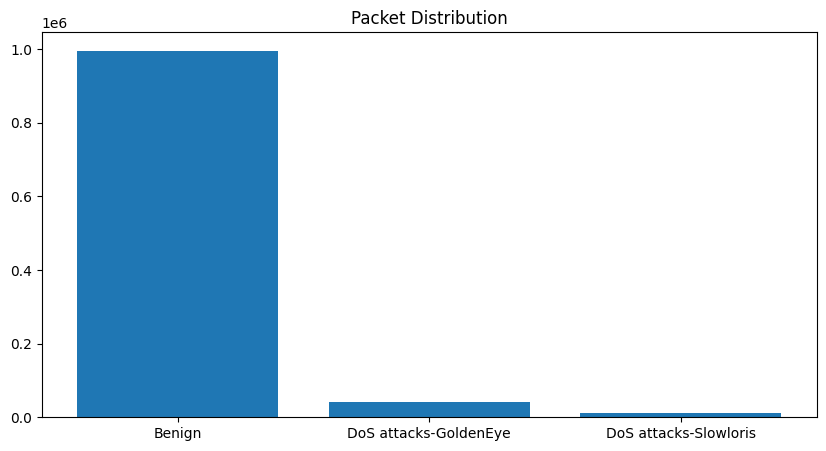

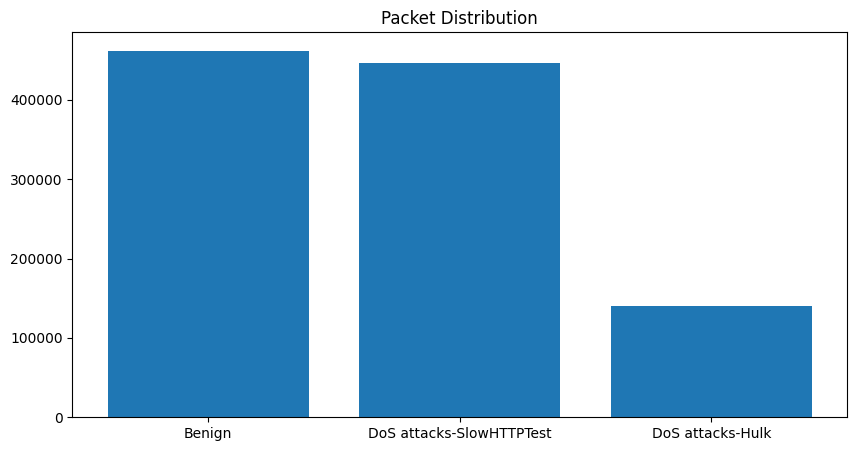

In [ ]:
visualizeBar(network_data_d1)
visualizeBar(network_data_d2)
visualizeBar(network_data_d3)

In [ ]:
def dropInfinateNull(df):
    print (df.shape)

    # drop all null values
    df.dropna(inplace=True)

    print (df.shape)

    return df

In [ ]:
network_data_d1 = dropInfinateNull(network_data_d1)
network_data_d2 = dropInfinateNull(network_data_d2)
network_data_d3 = dropInfinateNull(network_data_d3)

(1048575, 80)
(1046298, 80)
(1048575, 80)
(1043654, 80)
(1048574, 80)
(1048574, 80)


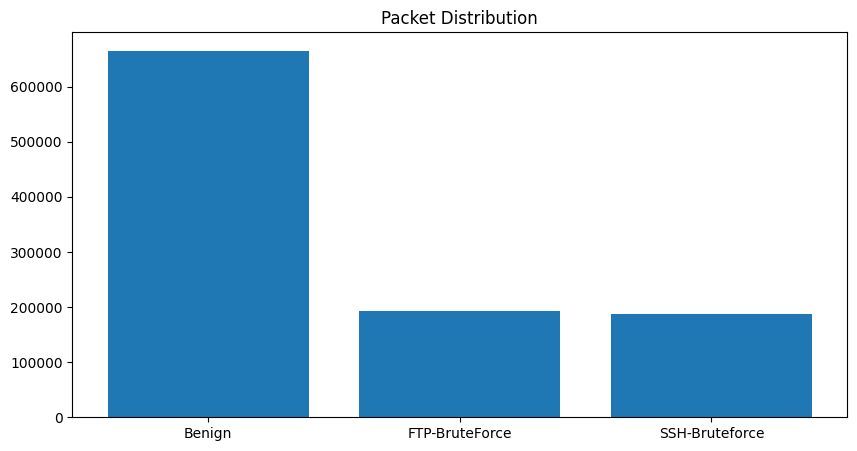

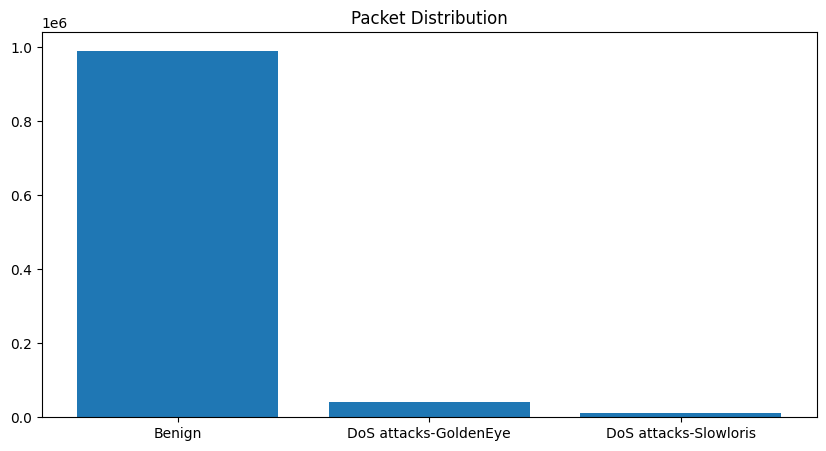

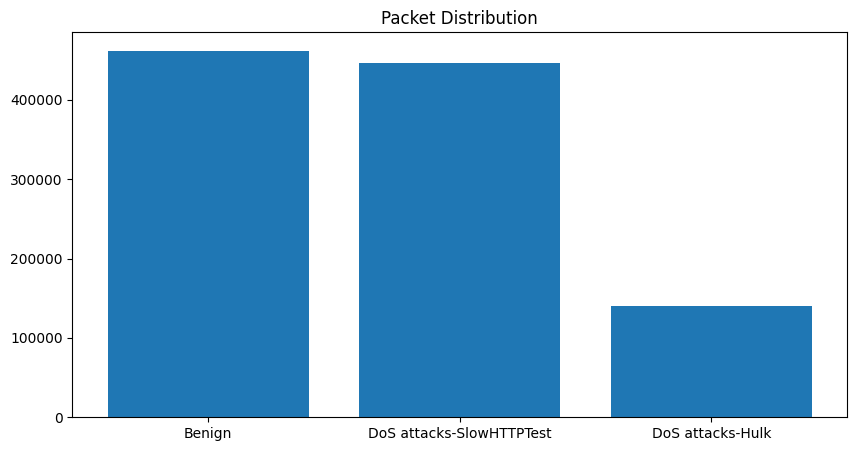

In [ ]:
visualizeBar(network_data_d1)
visualizeBar(network_data_d2)
visualizeBar(network_data_d3)

In [ ]:
# Drop Timestamp  column
def dropUnnecessaryColumn(df):
    df.drop(columns="Timestamp", inplace=True)
    print (df.shape)
    return df

In [ ]:
network_data_d1 = dropUnnecessaryColumn(network_data_d1)
network_data_d2 = dropUnnecessaryColumn(network_data_d2)
network_data_d3 = dropUnnecessaryColumn(network_data_d3)

(1048575, 79)
(1048575, 79)
(1048574, 79)


In [ ]:
network_data_d1['Label'].value_counts()
network_data_d2['Label'].value_counts()
network_data_d3['Label'].value_counts()

Label
DoS attacks-Hulk            461912
Benign                      446772
DoS attacks-SlowHTTPTest    139890
Name: count, dtype: int64

In [ ]:
def transformTargetLabelToBinary(df, day):
    # encode the target feature
    print(day)
    df['Label'] = df['Label'].apply(lambda x: "Benign" if x == 'Benign' else "Malicious")
    print(df['Label'].unique())
    print(df['Label'].value_counts())
    return df

In [ ]:
network_data_d1 = transformTargetLabelToBinary(network_data_d1, "Day 1")
network_data_d2 = transformTargetLabelToBinary(network_data_d2, "Day 2")
network_data_d3 = transformTargetLabelToBinary(network_data_d3, "Day 3")

Day 1
['Benign' 'Malicious']
Label
Benign       667626
Malicious    380949
Name: count, dtype: int64
Day 2
['Benign' 'Malicious']
Label
Benign       996077
Malicious     52498
Name: count, dtype: int64
Day 3
['Benign' 'Malicious']
Label
Malicious    601802
Benign       446772
Name: count, dtype: int64


In [ ]:
# applying oversampling #current ram error
#ros = RandomOverSampler()
#X_balanced, y_balanced = ros.fit_resample(X, y) # insted of X, y use the direct syntex

In [ ]:
# applying oversampling #current ram error
 #rus = RandomUnderSampler()
 #X_balanced, y_balanced = rus.fit_resample(X, y) # insted of X, y use the direct syntex

In [ ]:
def balanceData(df):
    # split data into features and target
    X=df.drop(["Label"], axis=1)
    y=df["Label"]

    # applying oversampling
    rus = RandomUnderSampler()
    X_balanced, y_balanced = rus.fit_resample(X, y) # insted of X, y use the direct syntex

    df = pd.concat([X_balanced, y_balanced], axis=1)
    del X, y, X_balanced, y_balanced
    print (df.shape)
    print(df['Label'].value_counts())

    return df

In [ ]:
network_data_d1 = balanceData(network_data_d1)
network_data_d2 = balanceData(network_data_d2)
network_data_d3 = balanceData(network_data_d3)

(761898, 80)
Label
Benign       380949
Malicious    380949
Name: count, dtype: int64
(104996, 80)
Label
Benign       52498
Malicious    52498
Name: count, dtype: int64
(893544, 80)
Label
Benign       446772
Malicious    446772
Name: count, dtype: int64


In [ ]:
#Data Concatenation
network_data = pd.concat([network_data_d1, network_data_d2], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d1, network_data_d2

network_data = pd.concat([network_data, network_data_d3], axis=0)
network_data.reset_index(drop=True, inplace=True)
del network_data_d3

In [ ]:
network_data['Label'].value_counts()

Label
Benign       1035249
Malicious    1035249
Name: count, dtype: int64

In [ ]:

X=network_data.drop(["Label"], axis=1)
y=network_data["Label"]

In [ ]:
# drop the constant columns (which varience is 0)
variances = network_data.var(numeric_only=True)
constant_columns = variances[variances == 0].index
network_data = network_data.drop(constant_columns, axis=1)

print(constant_columns)
print (network_data.shape)

Index(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count',
       'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg',
       'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg'],
      dtype='object')
(1760438, 69)


In [ ]:
#Remove equal columns in the DataFrame, rearrange the DataFrame to contain less repetitive information. This removes unnecessary or redundant information during the modeling process.duplicates = set()
for i in range(0, len(network_data.columns)):
    col1 = network_data.columns[i]
    for j in range(i+1, len(network_data.columns)):
        col2 = network_data.columns[j]
        if(network_data[col1].equals(network_data[col2])):
            duplicates.add(col2)

print (duplicates)
network_data.drop(duplicates, axis=1, inplace=True)
print (network_data.shape)

{'Subflow Bwd Byts', 'Subflow Fwd Byts', 'SYN Flag Cnt', 'Fwd Seg Size Avg', 'Subflow Bwd Pkts', 'ECE Flag Cnt', 'Subflow Fwd Pkts'}
(1760438, 62)


In [ ]:
network_data['Label'] = network_data['Label'].apply(lambda x: 0 if x == 'Benign' else 1)
print(network_data['Label'].unique())

[0 1]


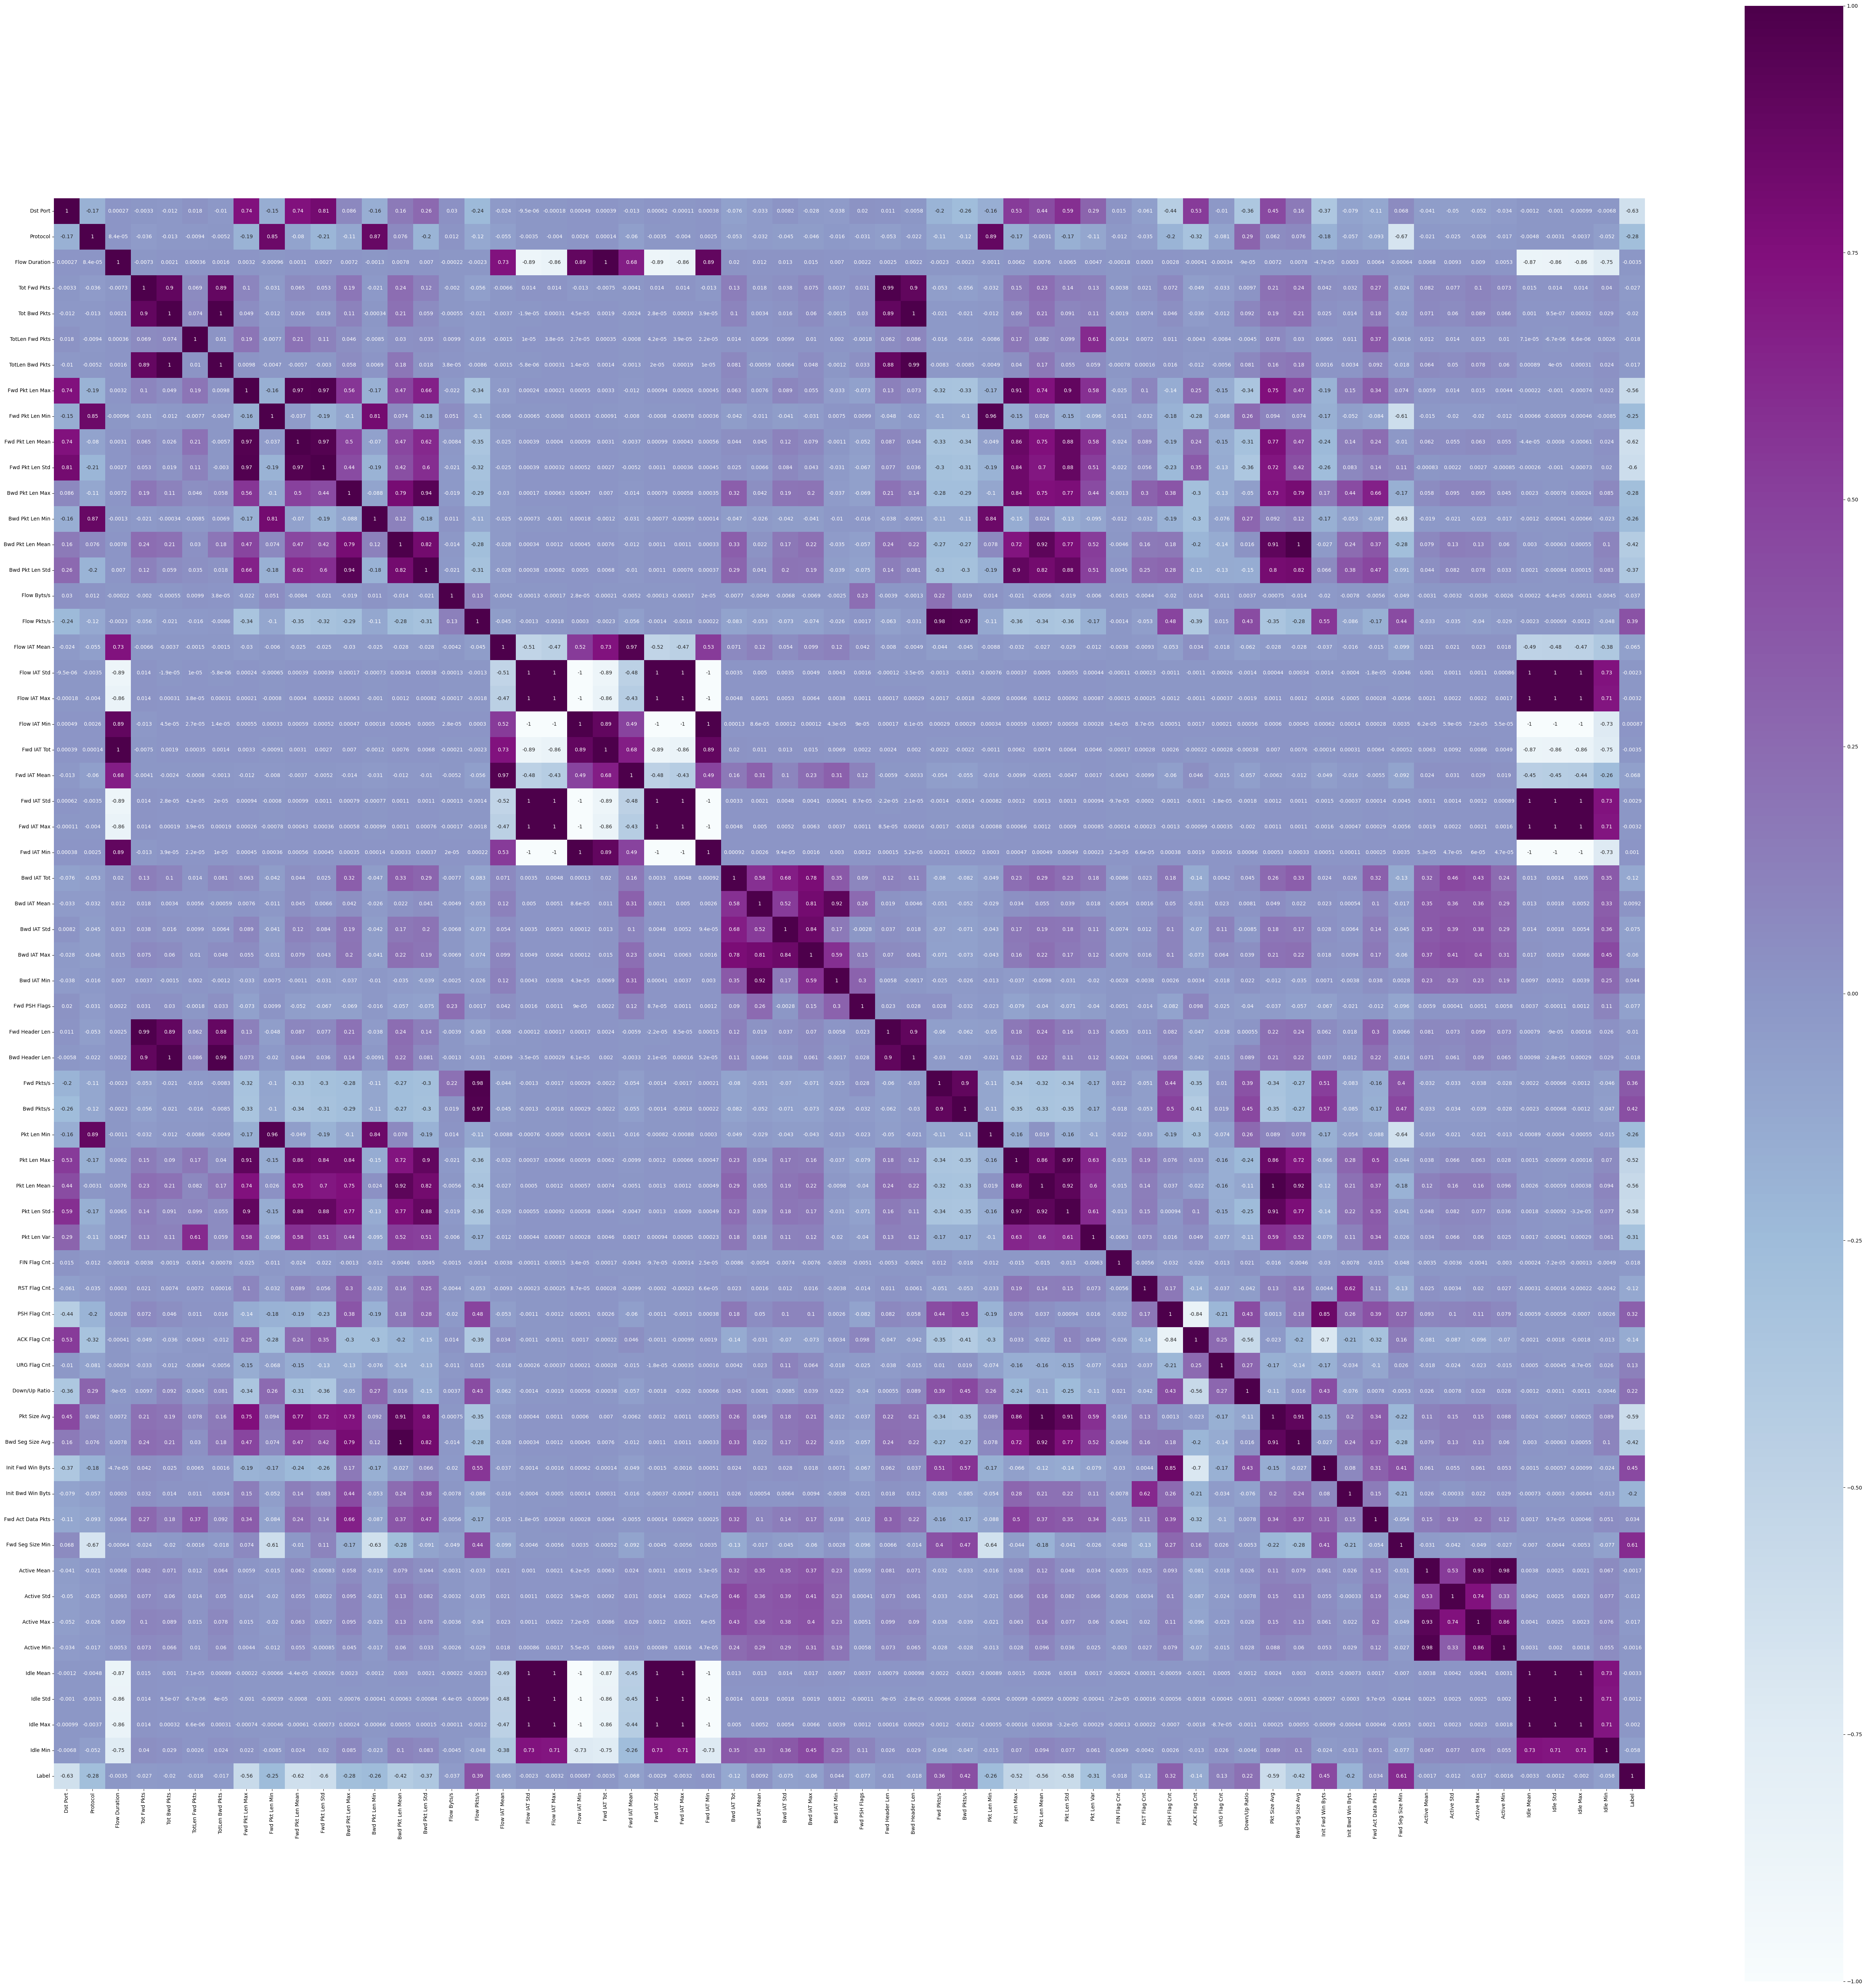

In [ ]:
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='BuPu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [ ]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.90
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'Bwd Pkt Len Mean', 'Idle Std', 'Fwd IAT Max', 'Bwd Pkt Len Max', 'Fwd Pkt Len Min', 'TotLen Bwd Pkts', 'Flow Pkts/s', 'Idle Mean', 'Fwd IAT Std', 'Fwd Pkt Len Max', 'Tot Fwd Pkts', 'Pkt Len Mean', 'Fwd Pkts/s', 'Bwd IAT Mean', 'Pkt Len Max', 'Flow Duration', 'Pkt Size Avg', 'Flow IAT Max', 'Flow IAT Mean', 'Flow IAT Min', 'Tot Bwd Pkts', 'Pkt Len Std', 'Fwd Pkt Len Mean', 'Flow IAT Std', 'Active Mean'}
25


In [ ]:
X=network_data.drop(["Label"], axis=1)
y=network_data["Label"]

# split the data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42, shuffle=True)

# K-fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
network_data.drop(correlated_col, axis=1, inplace=True)
print (network_data.shape)

(1760438, 37)


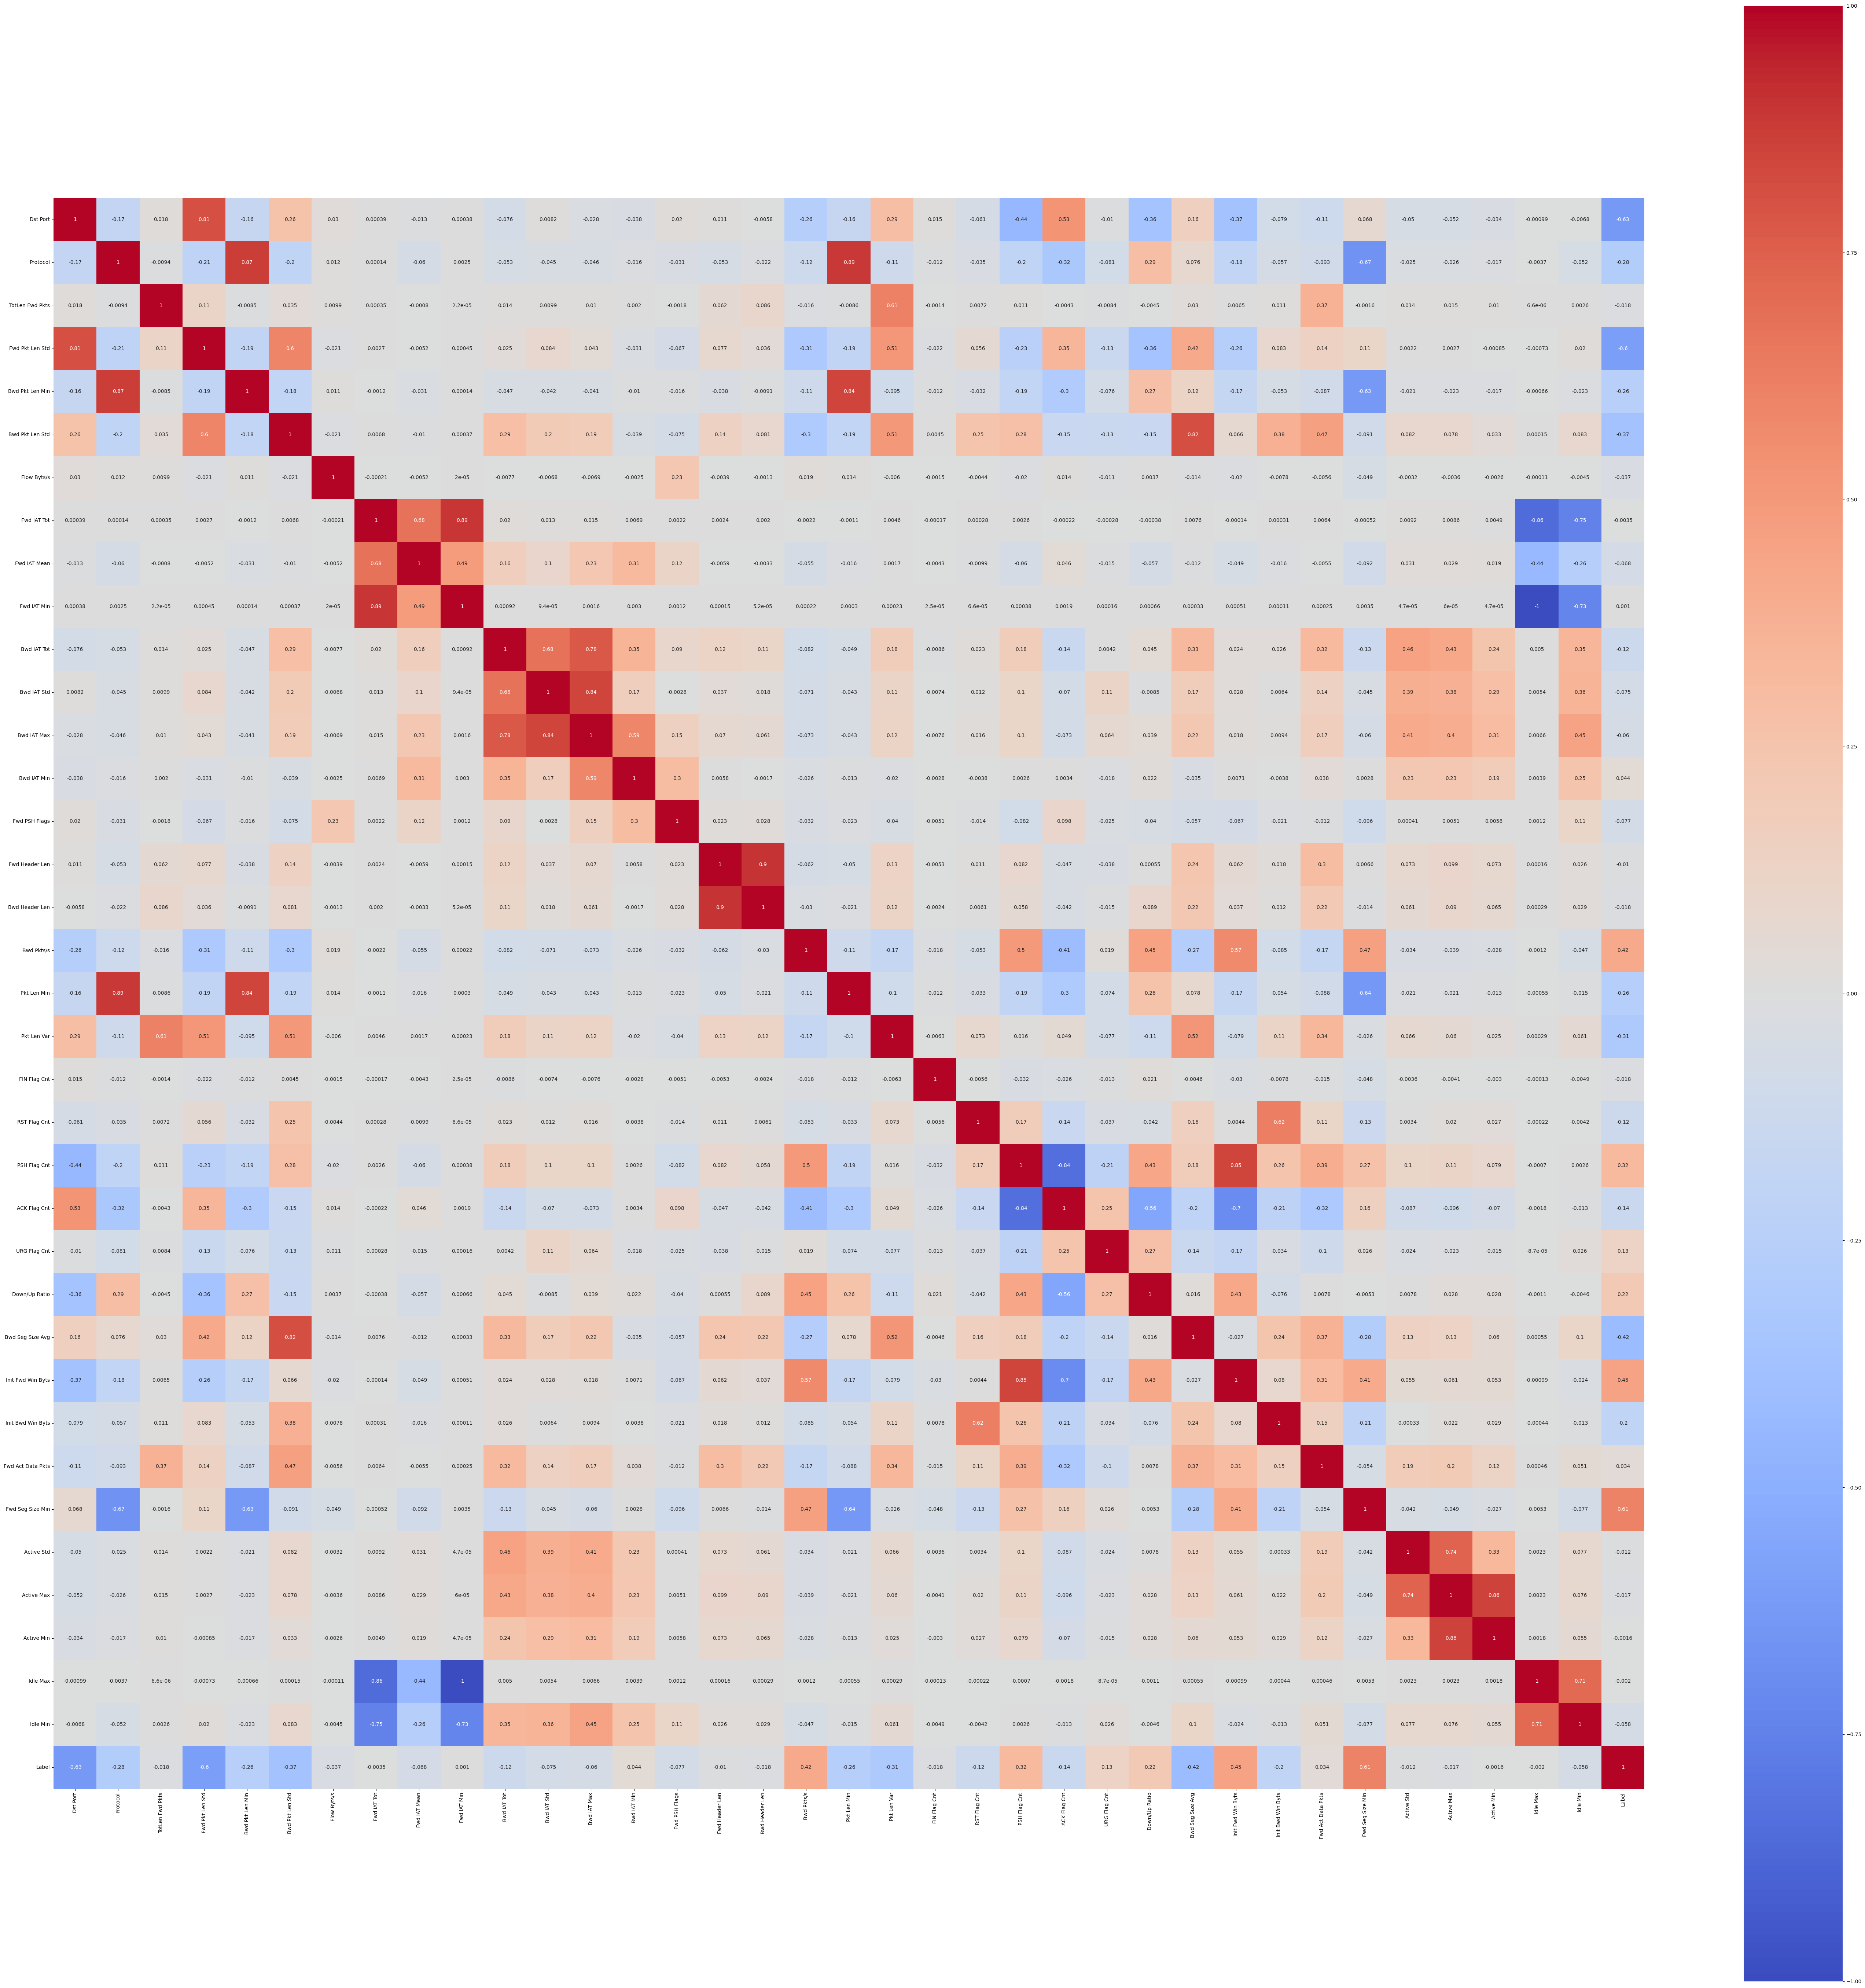

In [ ]:
plt.figure(figsize=(70, 70))
corr = network_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [ ]:
np.isnan(network_data.any()) #and gets False
np.isfinite(network_data.all()) #and gets True

Dst Port             True
Protocol             True
TotLen Fwd Pkts      True
Fwd Pkt Len Std      True
Bwd Pkt Len Min      True
Bwd Pkt Len Std      True
Flow Byts/s          True
Fwd IAT Tot          True
Fwd IAT Mean         True
Fwd IAT Min          True
Bwd IAT Tot          True
Bwd IAT Std          True
Bwd IAT Max          True
Bwd IAT Min          True
Fwd PSH Flags        True
Fwd Header Len       True
Bwd Header Len       True
Bwd Pkts/s           True
Pkt Len Min          True
Pkt Len Var          True
FIN Flag Cnt         True
RST Flag Cnt         True
PSH Flag Cnt         True
ACK Flag Cnt         True
URG Flag Cnt         True
Down/Up Ratio        True
Bwd Seg Size Avg     True
Init Fwd Win Byts    True
Init Bwd Win Byts    True
Fwd Act Data Pkts    True
Fwd Seg Size Min     True
Active Std           True
Active Max           True
Active Min           True
Idle Max             True
Idle Min             True
Label                True
dtype: bool

In [ ]:
np.any(np.isnan(network_data))

True

In [ ]:
np.all(np.isfinite(network_data))

False

In [ ]:
X = X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
network_data.head()

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0        80         6  14/02/2018 02:55:19            920             3   
1      3389         6  14/02/2018 12:15:11        5217255            10   
2        53        17  14/02/2018 09:23:39           1376             1   
3      3389         6  14/02/2018 09:41:58        1096913             8   
4        80         6  14/02/2018 12:35:16       53899627             2   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             4              161              488              161   
1             7             1138             1581              677   
2             1               42              102               42   
3             7             1138             1581              677   
4             0                0                0                0   

   Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                0  ...                20          0.0         0.0   
1                0  ...                20          0.0         0.0   
2               42  ...                 8          0.0         0.0   
3                0  ...                20          0.0         0.0   
4                0  ...                20          0.0         0.0   

   Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min   Label  
0           0           0        0.0       0.0         0         0  Benign  
1           0           0        0.0       0.0         0         0  Benign  
2           0           0        0.0       0.0         0         0  Benign  
3           0           0        0.0       0.0         0         0  Benign  
4           0           0        0.0       0.0         0         0  Benign  

[5 rows x 80 columns]

In [ ]:
network_data

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0              80         6  14/02/2018 02:55:19            920             3   
1            3389         6  14/02/2018 12:15:11        5217255            10   
2              53        17  14/02/2018 09:23:39           1376             1   
3            3389         6  14/02/2018 09:41:58        1096913             8   
4              80         6  14/02/2018 12:35:16       53899627             2   
...           ...       ...                  ...            ...           ...   
1760433        80         6  16/02/2018 01:46:52           2555             2   
1760434        80         6  16/02/2018 01:48:20            338             2   
1760435        80         6  16/02/2018 01:47:43          79701             3   
1760436        80         6  16/02/2018 01:46:05           1976             2   
1760437        80         6  16/02/2018 01:46:55          27008             2   

         Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                   4              161              488              161   
1                   7             1138             1581              677   
2                   1               42              102               42   
3                   7             1138             1581              677   
4                   0                0                0                0   
...               ...              ...              ...              ...   
1760433             0                0                0                0   
1760434             0                0                0                0   
1760435             0                0                0                0   
1760436             0                0                0                0   
1760437             0                0                0                0   

         Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
0                      0  ...                20          0.0         0.0   
1                      0  ...                20          0.0         0.0   
2                     42  ...                 8          0.0         0.0   
3                      0  ...                20          0.0         0.0   
4                      0  ...                20          0.0         0.0   
...                  ...  ...               ...          ...         ...   
1760433                0  ...                32          0.0         0.0   
1760434                0  ...                32          0.0         0.0   
1760435                0  ...                32          0.0         0.0   
1760436                0  ...                32          0.0         0.0   
1760437                0  ...                32          0.0         0.0   

         Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
0                 0           0        0.0       0.0         0         0   
1                 0           0        0.0       0.0         0         0   
2                 0           0        0.0       0.0         0         0   
3                 0           0        0.0       0.0         0         0   
4                 0           0        0.0       0.0         0         0   
...             ...         ...        ...       ...       ...       ...   
1760433           0           0        0.0       0.0         0         0   
1760434           0           0        0.0       0.0         0         0   
1760435           0           0        0.0       0.0         0         0   
1760436           0           0        0.0       0.0         0         0   
1760437           0           0        0.0       0.0         0         0   

             Label  
0           Benign  
1           Benign  
2           Benign  
3           Benign  
4           Benign  
...            ...  
1760433  Malicious  
1760434  Malicious  
1760435  Malicious  
1760436  Malicious  
1760437  Malicious  

[1760438 rows x 80 columns]

In [ ]:
network_data = balanceData(network_data)

(2070498, 80)
Label
Benign       1035249
Malicious    1035249
Name: count, dtype: int64


In [ ]:
network_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2070498 entries, 2530131 to 3145723
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    int64  
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       int64  
 21  Flow IAT Min       int64  
 22  Fwd IAT Tot        int64  
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max      

In [ ]:
# replace +ve and -ve infinity with NaN
network_data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# drop missing values
network_data.dropna(inplace=True)

In [ ]:
network_data["Label"].value_counts()

Label
Malicious    1035243
Benign       1029358
Name: count, dtype: int64

In [ ]:
print(network_data.duplicated().sum())

373294


In [ ]:
network_data.drop_duplicates(inplace = True)

In [ ]:
print(network_data.duplicated().sum())

0


In [ ]:

RANDOM_STATE_SEED = 12

df = network_data
fig = go.Figure(data=[
    go.Bar(name='Benign',
           y=df["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=df["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [ ]:
df1 = df[df["Label"] == "Benign"][:566]
df2 = df[df["Label"] == "Malicious"][:566]
df_equal = pd.concat([ df1,df2], axis =0)

In [ ]:
df_equal.replace(to_replace="Benign", value=0, inplace=True)
df_equal.replace(to_replace="Malicious", value=1, inplace=True)

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Benign',
           y=df_equal["Label"].value_counts().values[0:1],
           x=['Benign'],
           text = df_equal["Label"].value_counts()[0:1],
           orientation='v',
           textposition='outside',),
    go.Bar(name='Malicious',
           y=df_equal["Label"].value_counts().values[1:2],
           x=['Malicious'],
           text = df_equal["Label"].value_counts()[1:2],
           orientation='v',
           textposition='outside',)
])
# Change the bar mode
fig.update_layout(
                  width=800,
                  height=600,
                  title=f'Class Distribution',
                  yaxis_title='Number of attacks',
                  xaxis_title='Attack Name',)
iplot(fig)

In [ ]:
train, test = train_test_split(df_equal, test_size=0.3, random_state=RANDOM_STATE_SEED)

In [ ]:
train.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 637927 to 1862074
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           792 non-null    int64  
 1   Protocol           792 non-null    int64  
 2   Timestamp          792 non-null    object 
 3   Flow Duration      792 non-null    int64  
 4   Tot Fwd Pkts       792 non-null    int64  
 5   Tot Bwd Pkts       792 non-null    int64  
 6   TotLen Fwd Pkts    792 non-null    int64  
 7   TotLen Bwd Pkts    792 non-null    int64  
 8   Fwd Pkt Len Max    792 non-null    int64  
 9   Fwd Pkt Len Min    792 non-null    int64  
 10  Fwd Pkt Len Mean   792 non-null    float64
 11  Fwd Pkt Len Std    792 non-null    float64
 12  Bwd Pkt Len Max    792 non-null    int64  
 13  Bwd Pkt Len Min    792 non-null    int64  
 14  Bwd Pkt Len Mean   792 non-null    float64
 15  Bwd Pkt Len Std    792 non-null    float64
 16  Flow Byts/s        792

In [ ]:
min_max_scaler = MinMaxScaler().fit(train[['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']])

In [ ]:
numerical_columns = ['Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min']

In [ ]:
train[numerical_columns] = min_max_scaler.transform(train[numerical_columns])

In [ ]:
train

Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
637927         80         6  14/02/2018 11:10:11   2.098078e-05      0.028571   
1038           21         6  14/02/2018 10:33:54   2.504670e-08      0.000000   
946            21         6  14/02/2018 10:33:52   3.339559e-08      0.000000   
436199       3389         6  14/02/2018 10:19:17   3.457622e-02      0.200000   
2641664     42232         6  16/02/2018 01:47:00   3.679622e-02      0.114286   
...           ...       ...                  ...            ...           ...   
900108         53        17  14/02/2018 04:41:11   2.387785e-06      0.000000   
1451909        80         6  15/02/2018 03:49:44   7.706033e-06      0.057143   
1156327        53        17  15/02/2018 11:19:50   2.337692e-06      0.000000   
1168519        53        17  15/02/2018 11:33:24   3.631771e-06      0.000000   
1862074        53        17  15/02/2018 02:17:24   4.074263e-06      0.000000   

         Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
637927       0.000000         0.000000         0.000000         0.000000   
1038         0.027778         0.000000         0.000000         0.000000   
946          0.027778         0.000000         0.000000         0.000000   
436199       0.333333         0.177024         0.074644         0.501898   
2641664      0.083333         0.146736         0.016522         0.709947   
...               ...              ...              ...              ...   
900108       0.027778         0.005493         0.002321         0.026576   
1451909      0.111111         0.023227         0.011015         0.112377   
1156327      0.027778         0.006591         0.002640         0.031891   
1168519      0.027778         0.006277         0.002549         0.030372   
1862074      0.027778         0.006748         0.002685         0.032650   

         Fwd Pkt Len Min  ...  Fwd Seg Size Min  Active Mean  Active Std  \
637927          0.000000  ...               0.5          0.0         0.0   
1038            0.000000  ...               1.0          0.0         0.0   
946             0.000000  ...               1.0          0.0         0.0   
436199          0.000000  ...               0.5          0.0         0.0   
2641664         0.000000  ...               0.8          0.0         0.0   
...                  ...  ...               ...          ...         ...   
900108          0.111111  ...               0.2          0.0         0.0   
1451909         0.000000  ...               0.5          0.0         0.0   
1156327         0.133333  ...               0.2          0.0         0.0   
1168519         0.126984  ...               0.2          0.0         0.0   
1862074         0.136508  ...               0.2          0.0         0.0   

         Active Max  Active Min  Idle Mean  Idle Std  Idle Max  Idle Min  \
637927          0.0         0.0        0.0       0.0       0.0       0.0   
1038            0.0         0.0        0.0       0.0       0.0       0.0   
946             0.0         0.0        0.0       0.0       0.0       0.0   
436199          0.0         0.0        0.0       0.0       0.0       0.0   
2641664         0.0         0.0        0.0       0.0       0.0       0.0   
...             ...         ...        ...       ...       ...       ...   
900108          0.0         0.0        0.0       0.0       0.0       0.0   
1451909         0.0         0.0        0.0       0.0       0.0       0.0   
1156327         0.0         0.0        0.0       0.0       0.0       0.0   
1168519         0.0         0.0        0.0       0.0       0.0       0.0   
1862074         0.0         0.0        0.0       0.0       0.0       0.0   

         Label  
637927       0  
1038         1  
946          1  
436199       0  
2641664      0  
...        ...  
900108       0  
1451909      0  
1156327      0  
1168519      0  
1862074      0  

[792 rows x 80 columns]

In [ ]:
train.drop(['Timestamp'], axis=1,inplace=True)
test.drop(['Timestamp'],axis=1,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 792 entries, 637927 to 1862074
Data columns (total 79 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dst Port           792 non-null    int64  
 1   Protocol           792 non-null    int64  
 2   Flow Duration      792 non-null    float64
 3   Tot Fwd Pkts       792 non-null    float64
 4   Tot Bwd Pkts       792 non-null    float64
 5   TotLen Fwd Pkts    792 non-null    float64
 6   TotLen Bwd Pkts    792 non-null    float64
 7   Fwd Pkt Len Max    792 non-null    float64
 8   Fwd Pkt Len Min    792 non-null    float64
 9   Fwd Pkt Len Mean   792 non-null    float64
 10  Fwd Pkt Len Std    792 non-null    float64
 11  Bwd Pkt Len Max    792 non-null    float64
 12  Bwd Pkt Len Min    792 non-null    float64
 13  Bwd Pkt Len Mean   792 non-null    float64
 14  Bwd Pkt Len Std    792 non-null    float64
 15  Flow Byts/s        792 non-null    float64
 16  Flow Pkts/s        792

In [ ]:
test[numerical_columns] = min_max_scaler.transform(test[numerical_columns])

In [ ]:
print("Full dataset:\n")
print("Benign: " + str(df_equal["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(df_equal["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Training set:\n")
print("Benign: " + str(train["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(train["Label"].value_counts()[[1]].sum()))
print("---------------")

print("Test set:\n")
print("Benign: " + str(test["Label"].value_counts()[[0]].sum()))
print("Malicious: " + str(test["Label"].value_counts()[[1]].sum()))


Full dataset:

Benign: 566
Malicious: 566
---------------
Training set:

Benign: 405
Malicious: 387
---------------
Test set:

Benign: 161
Malicious: 179


In [ ]:
y_train = np.array(train.pop("Label"))# pop removes "Label" from the dataframe
#y_train = np.array(train.pop("Timestamp"))
X_train = train.values

In [ ]:
y_test = np.array(test.pop("Label")) # pop removes "Label" from the dataframe
#y_test = np.array(test.pop("Timestamp"))
X_test = test.values

In [ ]:
#Decision Tree Model
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)

parameters = {'max_depth': [2, 4, 7], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 3, 5], 'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(estimator = dt, param_grid=parameters, scoring='accuracy', cv=4, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.87 %
Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
#Random Forest Model
rf = RandomForestClassifier(n_estimators=60)

parameters = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None]}

grid_search = GridSearchCV(estimator = rf, param_grid=parameters, scoring='accuracy', cv=4, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 100.00 %
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
#K Nearest Neghbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

parameters = {'n_neighbors': [3 ,4 , 5, 6, 7 ,8, 9 ,10, 12, 15], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}

grid_search = GridSearchCV(estimator = knn, param_grid=parameters, scoring='accuracy', cv=4, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.87 %
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
